#  Project: Hacker News Analysis

## (I) In the project, we'll work with a data set of submissions to [Hacker News](https://news.ycombinator.com/). 
Brief description:Hacker News is a popular technology site, where user-submitted stories (known as "posts") are voted and commented upon. The site is extremely popular in technology and startup circles. The top posts can attract hundreds of thousands of visitors.

## (II) The dataset fetched form [kaggle](https://www.kaggle.com/hacker-news/hacker-news-posts).
Description of dataset: This dataset is Hacker News posts from 2006-10 to 2019-06 (2,709,143 posts).

It includes the following columns:

    title: title of the post (self explanatory)
    url: the url of the item being linked to
    num_points: the number of upvotes the post received
    num_comments: the number of comments the post received
    author: the name of the account that made the post
    created_at: the date and time the post was made (the time zone is Eastern Time in the US)

## (III) Objectives: Indentifying features of the posts attracting more views

## (IV) Potential applications, for example:
#### 1. For tech business: analyzing the posts with emerging interests
#### 2. For advertisers:  Indentifying the highly-viewed posts to broadcast Ads in the future similar posts
#### 3. For site owner: helping to classify the posts in detailed categories.
#### ......

## (V) Methodology
1. Fetch the dataset from kaggle (requests).
2. Store the dataset in the database (pySpark).
3. Extract data with indentified time range (Spark SQL).
4. Clean and manipulate data (Pandas).
5. Visualize 'views' frequency table to indentidy highly-viewed post (Matplotlib).
6. Natural language process of the 'title' of posts by following steps: remove punctuations, tokenize,remove stopwords, and lemmatize (or stem) (nltk).
7. Vectorize processed 'title' into Bag-Of-Words (BoWs) or N-gram (sklearn).
<br /> (Optional) Feature engineer the data.
8. Build ML classifiers: random forest with GridSearchCV to exploring model parameters (sklearn).
9. Validate the model accuracy and visualize the result with confusion matrix (sklearn and seaborn).
10. Cluster posts by BoWs and title length using K-means clustering (sklearn). 

## (VI) Analysis
## 1. Fetch the dataset from kaggle

In [1]:
import requests
data_url = "https://www.kaggle.com/santiagobasulto/all-hacker-news-posts-stories-askshow-hn-polls/downloads/all-hacker-news-posts-stories-askshow-hn-polls.zip/4"
response = requests.get(data_url)
if response.status_code == 200:
    print("Success")
else:
    print("Check URL")

Success


## 2. Store the dataset in the database

In [2]:
# Import PySpark and initialize SparkContext object.
import pyspark
sc = pyspark.SparkContext()

In [3]:
#Instantiating the SQLContext class.
from pyspark.sql import SQLContext
# Pass in the SparkContext object `sc`
sqlCtx = SQLContext(sc)

In [4]:
df = sqlCtx.read.csv('hn.csv')
print(type(df))
df.show(5)

<class 'pyspark.sql.dataframe.DataFrame'>
+---------+--------------------+---------+-----------+-------------------+--------------------+------+------------------+
|      _c0|                 _c1|      _c2|        _c3|                _c4|                 _c5|   _c6|               _c7|
+---------+--------------------+---------+-----------+-------------------+--------------------+------+------------------+
|Object ID|               Title|Post Type|     Author|         Created At|                 URL|Points|Number of Comments|
|        1|        Y Combinator|    story|         pg|2006-10-09 18:21:51|http://ycombinato...|    61|              18.0|
|        2|A Student's Guide...|    story|    phyllis|2006-10-09 18:30:28|http://www.paulgr...|    16|               1.0|
|        3|Woz Interview: th...|    story|    phyllis|2006-10-09 18:40:33|http://www.founde...|     7|               1.0|
|        4|NYC Developer Dil...|    story|onebeerdave|2006-10-09 18:47:42|http://avc.blogs....|     5|  

In [5]:
# Register the DataFrame df as a table.
df.registerTempTable('hackernews')
tables = sqlCtx.tableNames()
print(tables)

['hackernews']


In [6]:
df.count()

2709143

### Only 'Title', 'Post Type', 'Created At', 'Points' (View), and 'Number of Comments' are needed for further anaysis.

In [7]:
df_reduced = sqlCtx.sql('select _c1, _c2,_c4,_c6,_c7 from hackernews')
print(df_reduced.count())
df_reduced.show()

2709143
+--------------------+---------+-------------------+------+------------------+
|                 _c1|      _c2|                _c4|   _c6|               _c7|
+--------------------+---------+-------------------+------+------------------+
|               Title|Post Type|         Created At|Points|Number of Comments|
|        Y Combinator|    story|2006-10-09 18:21:51|    61|              18.0|
|A Student's Guide...|    story|2006-10-09 18:30:28|    16|               1.0|
|Woz Interview: th...|    story|2006-10-09 18:40:33|     7|               1.0|
|NYC Developer Dil...|    story|2006-10-09 18:47:42|     5|               1.0|
|Google, YouTube a...|    story|2006-10-09 18:51:04|     7|               1.0|
|Business Intellig...|    story|2006-10-09 18:56:40|     4|               1.0|
|Sevin Rosen Unfun...|    story|2006-10-09 19:00:55|     5|               0.0|
|LikeBetter featur...|    story|2006-10-09 19:17:39|    10|               0.0|
|weekendr: social ...|    story|2006-10-09 1

## 3. Extract data with indentified time range
### Due to the computer performance, only latest data (2019) is used in the demo.

In [8]:
year = [2019]

In [9]:
# from Spark df to Pandas df
import pandas as pd 

def year_data(dataframe = df_reduced, year = year):
    import pandas as pd 
    year_df = pd.DataFrame()
    for i in year:
        dfx = df_reduced.filter(df['_c4'].startswith(str(i)))
        print(dfx.count())
        #print(dfx.toPandas())
        year_df = year_df.append(dfx.toPandas())
        print(year_df)
    return year_df

In [10]:
year_df = year_data(dataframe = df, year = year)

137208
                                                      _c1      _c2  \
0       The Tech That Was Fixed in 2018 and the Tech T...    story   
1         Why Is the Google Podcasts App Failing So Hard?    story   
2                               Doing Dishes Is the Worst    story   
3       Setting Up a MongoDB Replica Set with Docker a...    story   
4       History favors co-operation and non-zero sum g...    story   
5         The man turning China into a quantum superpower    story   
6           Ask HN: What are your New Year's resolutions?   ask_hn   
7                        An update on Python's governance    story   
8       Solid Passenger Traffic Growth and Moderate Ai...    story   
9       NASA’s OSIRIS-REx Spacecraft Enters Close Orbi...    story   
10                          First capital raise: complete    story   
11      Earth is missing a huge part of its crust. Now...    story   
12      The Chinese scientist who allegedly created CR...    story   
13           

In [11]:
year_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137208 entries, 0 to 137207
Data columns (total 5 columns):
_c1    137208 non-null object
_c2    137208 non-null object
_c4    137208 non-null object
_c6    137208 non-null object
_c7    137208 non-null object
dtypes: object(5)
memory usage: 5.2+ MB


## 4. Clean and manipulate data

In [12]:
# Rename the column titles of the dataframe.
df_rename = year_df.rename({'_c1':'title', '_c2':'genre','_c4':'time', '_c6':'view', '_c7':'comment'}, axis =  'columns')

In [13]:
df_rename['datetime'] = pd.to_datetime(df_rename.time, format='%Y-%m-%d')
df_cleaned = df_rename.drop(['time'], axis = 1) 

In [14]:
df_cleaned['view'] = pd.to_numeric(df_cleaned['view']) #assign datatype
df_cleaned['view'].dtype

dtype('int64')

In [15]:
df_cleaned['view'].isnull().sum() #check null

0

In [16]:
df_cleaned['view'].value_counts()

1       45391
2       37164
3       17181
4        7273
5        3645
6        2382
7        1663
8        1182
9         970
10        776
11        718
12        569
13        533
14        461
15        411
16        393
17        363
18        327
19        297
20        271
21        236
23        232
22        228
24        202
26        188
28        183
25        182
27        182
29        179
34        171
        ...  
970         1
964         1
927         1
799         1
671         1
582         1
3015        1
839         1
456         1
1310        1
798         1
670         1
584         1
714         1
1181        1
595         1
925         1
717         1
669         1
973         1
718         1
1102        1
591         1
719         1
540         1
1743        1
1179        1
722         1
467         1
701         1
Name: view, Length: 838, dtype: int64

## 5. Visualize 'views' frequency table to indentidy highly-viewed post

In [17]:
# frequency table for column:'view'
import numpy as np
step = 100 # resolution of the table
view_threshold = np.arange(100,1100,step)
print(view_threshold)

# Function to generate frequency table
def freq_view(dataframe = df_cleaned, segment = view_threshold,step =step):
    freq_table = {}
    for i in segment:
        b = i -step
        if i == segment.max():
            freq_table[str(i)+'< view'] = len(dataframe[(i) < dataframe['view']])
        if i == segment.min():
            freq_table[str(b)+' < view < '+str(i)] = len(dataframe[dataframe['view'] < i])
        else:
            freq_table[str(b)+' < view < '+str(i)] = len(dataframe[dataframe['view'] < i])\
            - len(dataframe[dataframe['view'] < b])
    return freq_table

[ 100  200  300  400  500  600  700  800  900 1000]


In [18]:
freq_table = freq_view()
print(freq_table)

{'0 < view < 100': 130458, '100 < view < 200': 3730, '200 < view < 300': 1453, '300 < view < 400': 705, '400 < view < 500': 317, '500 < view < 600': 193, '600 < view < 700': 114, '700 < view < 800': 81, '800 < view < 900': 43, '1000< view': 87, '900 < view < 1000': 27}


In [19]:
df_freq = pd.DataFrame.from_dict(freq_table, orient='index')

In [20]:
high_view_percent = len(df_cleaned[df_cleaned['view']>100])/len(df_cleaned)
high_view_percent

0.048823683750218644

### 4.9% of total posts in 2019 have more than 100 views

In [21]:
df_freq2 = df_freq.reindex(['0 < view < 100', '100 < view < 200', '200 < view < 300',
       '300 < view < 400', '400 < view < 500', '500 < view < 600',
       '600 < view < 700', '700 < view < 800', '800 < view < 900',
     '900 < view < 1000',  '1000< view'])
df_freq3 =  df_freq2.rename({0:'count'}, axis =  'columns')

In [22]:
df_freq3 

,count
0 < view < 100,130458
100 < view < 200,3730
200 < view < 300,1453
300 < view < 400,705
400 < view < 500,317
500 < view < 600,193
600 < view < 700,114
700 < view < 800,81
800 < view < 900,43
900 < view < 1000,27


Text(0, 0.5, 'Count')

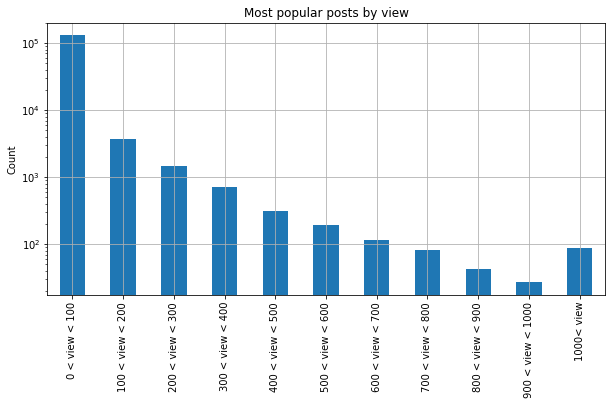

In [65]:
import matplotlib.pyplot as plt
df_freq3.plot.bar(logy=True, legend = False, figsize=(10, 5), title = 'Most popular posts by view',grid = True)
plt.ylabel('Count')

### According to the figure, posts with more than 100 views are defined as highly viewed posts

## 5.1 Factors attracting more views

Before we start NLP of the post titles, we have to verify other factors may attracting more views. For example, the genre of the posts. Posts with 'ask_hn' are asking questions to the vistor, which are possible to get more views. The time of the posts created in a day could also affects the total view counts, since the degree of audience exposure is different.    

### Check if certain 'genre' attacting more views

In [24]:
df_cleaned['genre'].value_counts()

story      126846
ask_hn       5454
show_hn      4902
poll            6
Name: genre, dtype: int64

In [25]:
genre = ['story', 'ask_hn', 'show_hn','poll']
 
def avg_view(dataframe = df_cleaned, genre = genre):
    avg_count = {}
    for i in genre:
        dfx = dataframe[dataframe.genre == i]
        avg_count[i] = dfx['view'].sum() / len(dfx)
    df_avg_count = pd.DataFrame.from_dict(avg_count, orient='index')
    return df_avg_count

In [26]:
df_avg_count = avg_view()

In [27]:
df_avg_count

,0
story,18.116117
ask_hn,14.362303
show_hn,17.159731
poll,2.166667


Text(0, 0.5, 'Count')

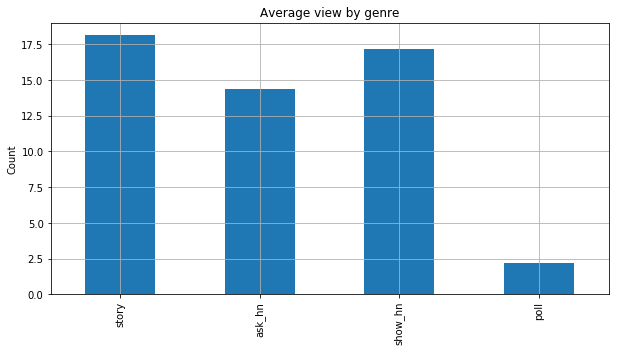

In [28]:
df_avg_count.plot.bar(legend = False, figsize=(10, 5), title = 'Average view by genre', grid = True)
plt.ylabel('Count')

### Table 'Average view by genre' indicates there is no significant difference between view counts and genre. 

### Check if posts created in a certain time period attacting more views

In [29]:
def avg_view_hr(dataframe = df_cleaned):
    avg_count_hr = {}
    for i in range(24):
        dfx = dataframe[dataframe.datetime.dt.hour == i]
        avg_count_hr[i] = dfx['view'].sum() / len(dfx)
    df_avg_hr = pd.DataFrame.from_dict(avg_count_hr, orient='index')
    return df_avg_hr

In [30]:
avg_count_hr = avg_view_hr()

In [31]:
avg_count_hr

,0
0,19.366131
1,18.475317
2,20.878297
3,18.319006
4,16.446761
5,16.606734
6,16.887613
7,15.670625
8,16.997912
9,14.971899


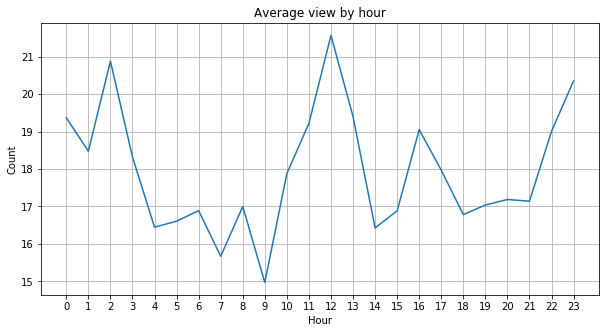

In [32]:
avg_count_hr.plot.line(legend = False, figsize=(10, 5), title = 'Average view by hour', grid = True)
plt.ylabel('Count')
plt.xlabel('Hour')
plt.xticks(np.arange(0,24,1))
plt.show()

### Table 'Average view by hour' indicates there are distinctions between view counts of posts created at different in a day. 
Posts created at noon (around 12 pm) and in night (10 pm to 2 am) got more views. The peak view count at 12 pm is 44% higher than lowest view count. The trend makes sense becasue Hacker News are popular in North America, and at around 12 pm (EST), people have lunch break to view the posts.

### Hereafter,  posts with more than 100 views are defined as highly viewed posts

In [33]:
df_cleaned = df_cleaned[df_cleaned.view >= 10].copy().reset_index(drop=True)
df_cleaned['tag'] = df_cleaned.view >= 100 # tag = True if post >= 100 views
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20357 entries, 0 to 20356
Data columns (total 6 columns):
title       20357 non-null object
genre       20357 non-null object
view        20357 non-null int64
comment     20357 non-null object
datetime    20357 non-null datetime64[ns]
tag         20357 non-null bool
dtypes: bool(1), datetime64[ns](1), int64(1), object(3)
memory usage: 815.2+ KB


In [34]:
# tag = True post >= 100 views
df_cleaned = df_cleaned[df_cleaned.view >= 10].copy().reset_index(drop=True)
df_cleaned['tag'] = df_cleaned.view >= 100
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20357 entries, 0 to 20356
Data columns (total 6 columns):
title       20357 non-null object
genre       20357 non-null object
view        20357 non-null int64
comment     20357 non-null object
datetime    20357 non-null datetime64[ns]
tag         20357 non-null bool
dtypes: bool(1), datetime64[ns](1), int64(1), object(3)
memory usage: 815.2+ KB


## 6. Natural language process of the 'title' of posts

In [35]:
import nltk

In [36]:
# Remove punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
# Function to remove punctuations in the titles
def remove_punct(text):
    text_nonpunct = "".join([char for char in text if char not in string.punctuation])
    return text_nonpunct

df_cleaned['title_nonpunct'] = df_cleaned['title'].apply(lambda x: remove_punct(x))

df_cleaned.head()

,title,genre,view,comment,datetime,tag,title_nonpunct
0,NASA’s OSIRIS-REx Spacecraft Enters Close Orbi...,story,54,9.0,2019-01-01 00:31:55,False,NASA’s OSIRISREx Spacecraft Enters Close Orbit...
1,Earth is missing a huge part of its crust. Now...,story,16,6.0,2019-01-01 00:38:15,False,Earth is missing a huge part of its crust Now ...
2,The Chinese scientist who allegedly created CR...,story,171,150.0,2019-01-01 00:44:07,True,The Chinese scientist who allegedly created CR...
3,Show HN: Snigl – Forth with Lisp in C,show_hn,87,8.0,2019-01-01 00:59:23,False,Show HN Snigl – Forth with Lisp in C
4,Ask HN: How do you find roles as a solo develo...,ask_hn,34,18.0,2019-01-01 01:21:23,False,Ask HN How do you find roles as a solo developer


In [38]:
#Tokenize title
import re
def tokenize(text):
    token = re.split('\W+',text)
    return token

df_cleaned['body_text_tokenized'] = df_cleaned['title_nonpunct'].apply(lambda x: tokenize(x.lower()))
df_cleaned.head()

,title,genre,view,comment,datetime,tag,title_nonpunct,body_text_tokenized
0,NASA’s OSIRIS-REx Spacecraft Enters Close Orbi...,story,54,9.0,2019-01-01 00:31:55,False,NASA’s OSIRISREx Spacecraft Enters Close Orbit...,"[nasa, s, osirisrex, spacecraft, enters, close..."
1,Earth is missing a huge part of its crust. Now...,story,16,6.0,2019-01-01 00:38:15,False,Earth is missing a huge part of its crust Now ...,"[earth, is, missing, a, huge, part, of, its, c..."
2,The Chinese scientist who allegedly created CR...,story,171,150.0,2019-01-01 00:44:07,True,The Chinese scientist who allegedly created CR...,"[the, chinese, scientist, who, allegedly, crea..."
3,Show HN: Snigl – Forth with Lisp in C,show_hn,87,8.0,2019-01-01 00:59:23,False,Show HN Snigl – Forth with Lisp in C,"[show, hn, snigl, forth, with, lisp, in, c]"
4,Ask HN: How do you find roles as a solo develo...,ask_hn,34,18.0,2019-01-01 01:21:23,False,Ask HN How do you find roles as a solo developer,"[ask, hn, how, do, you, find, roles, as, a, so..."


In [39]:
# Remove stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return text

df_cleaned['body_text_nonstop'] = df_cleaned['body_text_tokenized'].apply(lambda x: remove_stopwords(x))
df_cleaned.head()

,title,genre,view,comment,datetime,tag,title_nonpunct,body_text_tokenized,body_text_nonstop
0,NASA’s OSIRIS-REx Spacecraft Enters Close Orbi...,story,54,9.0,2019-01-01 00:31:55,False,NASA’s OSIRISREx Spacecraft Enters Close Orbit...,"[nasa, s, osirisrex, spacecraft, enters, close...","[nasa, osirisrex, spacecraft, enters, close, o..."
1,Earth is missing a huge part of its crust. Now...,story,16,6.0,2019-01-01 00:38:15,False,Earth is missing a huge part of its crust Now ...,"[earth, is, missing, a, huge, part, of, its, c...","[earth, missing, huge, part, crust, may, know]"
2,The Chinese scientist who allegedly created CR...,story,171,150.0,2019-01-01 00:44:07,True,The Chinese scientist who allegedly created CR...,"[the, chinese, scientist, who, allegedly, crea...","[chinese, scientist, allegedly, created, crisp..."
3,Show HN: Snigl – Forth with Lisp in C,show_hn,87,8.0,2019-01-01 00:59:23,False,Show HN Snigl – Forth with Lisp in C,"[show, hn, snigl, forth, with, lisp, in, c]","[show, hn, snigl, forth, lisp, c]"
4,Ask HN: How do you find roles as a solo develo...,ask_hn,34,18.0,2019-01-01 01:21:23,False,Ask HN How do you find roles as a solo developer,"[ask, hn, how, do, you, find, roles, as, a, so...","[ask, hn, find, roles, solo, developer]"


In [40]:
#Stemming
ps = nltk.PorterStemmer()

def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

df_cleaned['body_text_stemmed'] = df_cleaned['body_text_nonstop'].apply(lambda x: stemming(x))
df_cleaned.head()

,title,genre,view,comment,datetime,tag,title_nonpunct,body_text_tokenized,body_text_nonstop,body_text_stemmed
0,NASA’s OSIRIS-REx Spacecraft Enters Close Orbi...,story,54,9.0,2019-01-01 00:31:55,False,NASA’s OSIRISREx Spacecraft Enters Close Orbit...,"[nasa, s, osirisrex, spacecraft, enters, close...","[nasa, osirisrex, spacecraft, enters, close, o...","[nasa, osirisrex, spacecraft, enter, close, or..."
1,Earth is missing a huge part of its crust. Now...,story,16,6.0,2019-01-01 00:38:15,False,Earth is missing a huge part of its crust Now ...,"[earth, is, missing, a, huge, part, of, its, c...","[earth, missing, huge, part, crust, may, know]","[earth, miss, huge, part, crust, may, know]"
2,The Chinese scientist who allegedly created CR...,story,171,150.0,2019-01-01 00:44:07,True,The Chinese scientist who allegedly created CR...,"[the, chinese, scientist, who, allegedly, crea...","[chinese, scientist, allegedly, created, crisp...","[chines, scientist, allegedli, creat, crispr, ..."
3,Show HN: Snigl – Forth with Lisp in C,show_hn,87,8.0,2019-01-01 00:59:23,False,Show HN Snigl – Forth with Lisp in C,"[show, hn, snigl, forth, with, lisp, in, c]","[show, hn, snigl, forth, lisp, c]","[show, hn, snigl, forth, lisp, c]"
4,Ask HN: How do you find roles as a solo develo...,ask_hn,34,18.0,2019-01-01 01:21:23,False,Ask HN How do you find roles as a solo developer,"[ask, hn, how, do, you, find, roles, as, a, so...","[ask, hn, find, roles, solo, developer]","[ask, hn, find, role, solo, develop]"


In [41]:
#Lemmatizing
wl = nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
    text = [wl.lemmatize(word) for word in tokenized_text]
    return text

df_cleaned['body_text_lemmatized'] = df_cleaned['body_text_nonstop'].apply(lambda x: lemmatizing(x))
df_cleaned.head()

,title,genre,view,comment,datetime,tag,title_nonpunct,body_text_tokenized,body_text_nonstop,body_text_stemmed,body_text_lemmatized
0,NASA’s OSIRIS-REx Spacecraft Enters Close Orbi...,story,54,9.0,2019-01-01 00:31:55,False,NASA’s OSIRISREx Spacecraft Enters Close Orbit...,"[nasa, s, osirisrex, spacecraft, enters, close...","[nasa, osirisrex, spacecraft, enters, close, o...","[nasa, osirisrex, spacecraft, enter, close, or...","[nasa, osirisrex, spacecraft, enters, close, o..."
1,Earth is missing a huge part of its crust. Now...,story,16,6.0,2019-01-01 00:38:15,False,Earth is missing a huge part of its crust Now ...,"[earth, is, missing, a, huge, part, of, its, c...","[earth, missing, huge, part, crust, may, know]","[earth, miss, huge, part, crust, may, know]","[earth, missing, huge, part, crust, may, know]"
2,The Chinese scientist who allegedly created CR...,story,171,150.0,2019-01-01 00:44:07,True,The Chinese scientist who allegedly created CR...,"[the, chinese, scientist, who, allegedly, crea...","[chinese, scientist, allegedly, created, crisp...","[chines, scientist, allegedli, creat, crispr, ...","[chinese, scientist, allegedly, created, crisp..."
3,Show HN: Snigl – Forth with Lisp in C,show_hn,87,8.0,2019-01-01 00:59:23,False,Show HN Snigl – Forth with Lisp in C,"[show, hn, snigl, forth, with, lisp, in, c]","[show, hn, snigl, forth, lisp, c]","[show, hn, snigl, forth, lisp, c]","[show, hn, snigl, forth, lisp, c]"
4,Ask HN: How do you find roles as a solo develo...,ask_hn,34,18.0,2019-01-01 01:21:23,False,Ask HN How do you find roles as a solo developer,"[ask, hn, how, do, you, find, roles, as, a, so...","[ask, hn, find, roles, solo, developer]","[ask, hn, find, role, solo, develop]","[ask, hn, find, role, solo, developer]"


In [42]:
# Saving the cleaned Data
df_cleaned.to_csv("hn_cleaned.csv", sep=',')

## 7. Vectorize processed 'title' into Bag-Of-Words (BoWs) or N-gram

In [43]:
#Function to remove punctuation, tokenize, remove stopwords, and stem
def clean_text(text):
    stopword = nltk.corpus.stopwords.words('english')
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [wl.lemmatize(word) for word in tokens if word not in stopword]
    return text

In [44]:
# Vectorize Data: Bag-Of-Words (1-gram)
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(analyzer = clean_text) 
word_count = count_vect.fit_transform(df_cleaned['title'])
print(word_count.shape)
print(count_vect.get_feature_names())

(20357, 20389)
['', '0', '00', '0006', '00s', '01', '010', '012', '012340', '013', '0196', '020', '0200', '0257', '0270', '0271', '0280', '029', '030', '031', '033', '040', '0405', '0411', '050', '0590rc0', '06', '060', '071', '0713', '08', '080', '081', '091', '0924', '0byte', '0patch', '0x', '0x300', '0x4015', '1', '10', '100', '1000', '10000', '100000', '1000x', '100b', '100bn', '100game', '100k', '100lb', '100m', '100mile', '100myearold', '100pct', '101', '1012', '1014', '10145', '1015', '102', '102kb', '103', '1031', '103m', '1052000', '1060hour', '107', '108', '10b', '10er', '10gbe', '10hour', '10k', '10m', '10nm', '10th', '10x', '10year', '10yearold', '11', '1100', '11000', '1108', '111', '1110', '1111', '1115', '112', '112b', '112m', '112mph', '112thread', '113', '1130', '113m', '114', '115', '1159', '115b', '115kmonth', '115m', '116', '1160', '117', '118', '118kfollower', '119', '119word', '11b', '11m', '11th', '12', '120', '12000', '120b', '120kmonth', '120m', '121', '1213', 

In [45]:
word_count_df = pd.DataFrame(word_count.toarray(), columns=count_vect.get_feature_names())

In [46]:
word_count_df.head()

,,0,00,0006,00s,01,010,012,012340,013,...,zte,zuckerberg,zuckerbergs,zulip,zx,zx81,étude,žižek,λcalculuschurch,π
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 8. Build ML classifiers: random forest with GridSearchCV to exploring model parameters

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
param = {'n_estimators': [10, 20, 30],
        'max_depth': [10, 20, 30]}

gs = GridSearchCV(rf, param, cv = 3)
gs_fit = gs.fit(word_count_df, df_cleaned['tag'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False).head()

C:\Users\li_au\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\li_au\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\li_au\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\li_au\Anaconda3\lib\site-packages\sklearn\util

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
8,53.731283,2.888986,0.843549,0.094402,30,30,"{'max_depth': 30, 'n_estimators': 30}",0.668435,0.668435,0.668681,0.668517,0.000116,1,0.668558,0.669000,0.669172,0.668910,0.000259
0,19.790458,0.826138,0.705806,0.068914,10,10,"{'max_depth': 10, 'n_estimators': 10}",0.668582,0.668435,0.668386,0.668468,0.000083,2,0.668926,0.668632,0.668435,0.668664,0.000202
1,15.976723,0.405290,0.623075,0.010919,10,20,"{'max_depth': 10, 'n_estimators': 20}",0.668435,0.668435,0.668386,0.668419,0.000023,3,0.668411,0.668411,0.668435,0.668419,0.000012
2,21.679624,1.972212,0.715871,0.037202,10,30,"{'max_depth': 10, 'n_estimators': 30}",0.668435,0.668435,0.668386,0.668419,0.000023,3,0.668411,0.668411,0.668435,0.668419,0.000012
3,17.254419,0.501606,0.628727,0.006138,20,10,"{'max_depth': 20, 'n_estimators': 10}",0.668435,0.668582,0.668239,0.668419,0.000141,3,0.669147,0.669958,0.668730,0.669278,0.000510


### The mean_test_score for n_estimators = 30 and max_depth = 30 gives the best result. 
Where n_estimators is the number of trees in the forest.(group of decision trees) and max_depth is the max number of levels in each decision tree. Parameter values are selected due to the computer performance.

### Improvements: 
1. n_estimators and max_depth could be further inceased.
2. Data used for training the model should also be increased
3. Feature enginner the data to get better fitting.
4. Vectorize Data used TF-IDF (Term Frequency — Inverse Data Frequency). 

## 9. Validate the model accuracy and visualize the result with confusion matrix

In [48]:
#using model to make a High/low_viewed predictor
from sklearn.model_selection import train_test_split
x = word_count_df
y = df_cleaned['tag']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [49]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs

In [50]:
rf = RandomForestClassifier(n_estimators=10, max_depth=20)
rf_model = rf.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

In [51]:
precision, recall, fscore, train_support = score(y_test, y_pred,pos_label= False, average='binary')
print('Accuracy: {}'.format(round(acs(y_test,y_pred), 3))) #validation the model accuracy

Accuracy: 0.66


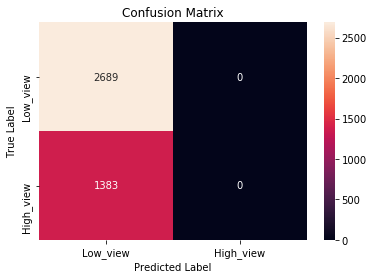

In [52]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_label = ["Low_view", "High_view"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Model gives an accuracy of 66.0%. 
Confusion Matrix tells us that we correctly predicted 2689 low_view.

## 10. Cluster posts by BoWs and title length using K-means clustering

### Vectorize Data used TF-IDF
The scores have the effect of highlighting words that are distinct (contain useful information) in a given document.

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
df_short = df_cleaned[df_cleaned.view >= 50].copy().reset_index(drop=True) # further reduce the data
df_short['tag'] = df_short.view >= 100
df_short.info()
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
df_tfidf = tfidf_vect.fit_transform(df_short['title'])

print(df_tfidf.shape)
print(tfidf_vect.get_feature_names())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10748 entries, 0 to 10747
Data columns (total 11 columns):
title                   10748 non-null object
genre                   10748 non-null object
view                    10748 non-null int64
comment                 10748 non-null object
datetime                10748 non-null datetime64[ns]
tag                     10748 non-null bool
title_nonpunct          10748 non-null object
body_text_tokenized     10748 non-null object
body_text_nonstop       10748 non-null object
body_text_stemmed       10748 non-null object
body_text_lemmatized    10748 non-null object
dtypes: bool(1), datetime64[ns](1), int64(1), object(8)
memory usage: 850.3+ KB
(10748, 14206)
['', '0', '00', '00s', '01', '012', '013', '020', '0200', '0257', '0280', '029', '031', '040', '0411', '050', '0590rc0', '06', '060', '071', '0713', '08', '080', '081', '091', '0924', '0patch', '0x', '0x300', '0x4015', '1', '10', '100', '1000', '100000', '100b', '100game', '100k', '10

In [54]:
word_count_short_df = pd.DataFrame(df_tfidf.toarray(), columns=tfidf_vect.get_feature_names())
word_count_short_df.head()

,,0,00,00s,01,012,013,020,0200,0257,...,zotero,zsh,zstandard,zte,zuckerberg,zuckerbergs,zulip,zx,zx81,λcalculuschurch
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, random_state=1)
post_d = km.fit_transform(word_count_short_df)

In [56]:
post_d

array([[1.00006818, 1.03843059],
       [0.99940167, 1.03896857],
       [0.99870365, 0.95349165],
       ...,
       [0.99978455, 0.98467571],
       [1.00017578, 1.03862589],
       [1.00016877, 1.03896857]])

In [57]:
labels = km.labels_
print(pd.crosstab(labels, df_short['tag']))

tag    False  True 
row_0              
0       3700   6368
1        298    382


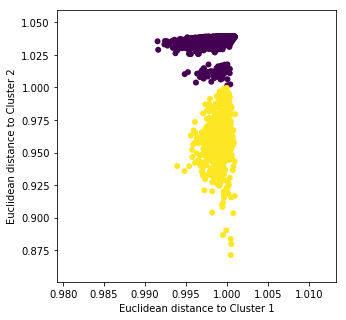

In [58]:
plt.figure(figsize = (5, 5))
plt.scatter(x=post_d[:,0], y=post_d[:,1], c=labels, linewidths=0) #purple is 1
plt.xlabel("Euclidean distance to Cluster 1")
plt.ylabel("Euclidean distance to Cluster 2")
plt.show()

According to the crosstab, the posts highly viewed are not efficiently clustered. A possible reason is some highly viewed posts contain less keywords to cluster.

### Feature engineer the data by title lengths

In [59]:
df_short['length'] = df_short['body_text_lemmatized'].apply(lambda x: len(x))
df_short['length_normalized'] = df_short['length'] / df_short['length'].max()
word_short_feature_df = pd.concat([df_short['length_normalized'], pd.DataFrame(df_tfidf.toarray())], axis=1)

In [60]:
word_short_feature_df.head()

,length_normalized,0,1,2,3,4,5,6,7,8,...,14196,14197,14198,14199,14200,14201,14202,14203,14204,14205
0,0.571429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.642857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
km = KMeans(n_clusters=2, random_state=1)
post_d_len = km.fit_transform(word_short_feature_df)

In [62]:
post_d_len

array([[1.00129337, 1.04330425],
       [0.99978411, 1.02525802],
       [0.99697701, 1.00759965],
       ...,
       [1.02749445, 1.12149377],
       [1.01562036, 1.00340029],
       [1.02991101, 1.00040862]])

In [63]:
labels = km.labels_
print(pd.crosstab(labels, df_short['tag']))

tag    False  True 
row_0              
0       2190   3515
1       1808   3235


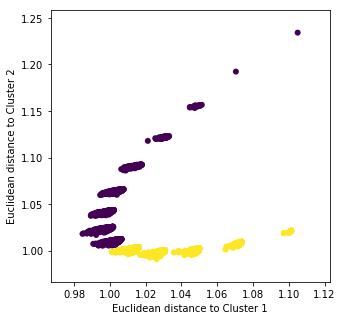

In [64]:
plt.figure(figsize = (5, 5)) #purple is 1
plt.scatter(x=post_d_len[:,0], y=post_d_len[:,1], c=labels, linewidths=0)
plt.xlabel("Euclidean distance to Cluster 1")
plt.ylabel("Euclidean distance to Cluster 2")
plt.show()

Further feature engineering is required for better clustering.

## (VII) Conclusions

In summary:
1. 4.9% of total posts in 2019 have more than 100 views
2. No significant difference between view counts and genre. 
3. Posts created at noon (around 12 pm) and in night (10 pm to 2 am) got more views.
4. Random forest classifier has an accuracy of 65.7%, but need further improvement.
5. Cluster of the post need more work on feature engineering.